In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from  sklearn.preprocessing import LabelEncoder
import pickle

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# For Modelling part
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

# For Evaluation and Tuning part
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import optuna
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
excel_file = 'data_filtered.xlsx'
xls = pd.ExcelFile(excel_file, engine='openpyxl')  # Specify engine if needed
df = pd.read_excel(xls, sheet_name='Sheet1')

In [3]:
df.drop(columns = ['satıldı'], inplace = True)
data = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avtosalon                     10000 non-null  int64  
 1   Qiymet_AZN                    10000 non-null  float64
 2   Şəhər                         10000 non-null  object 
 3   Marka                         10000 non-null  object 
 4   Model                         10000 non-null  object 
 5   Buraxılış ili                 10000 non-null  int64  
 6   Ban növü                      10000 non-null  object 
 7   Rəng                          10000 non-null  object 
 8   Yürüş                         10000 non-null  int64  
 9   Sürətlər qutusu               10000 non-null  object 
 10  Ötürücü                       10000 non-null  object 
 11  Yeni                          10000 non-null  object 
 12  Baxışların sayı               10000 non-null  int64  
 13  Sa

In [5]:
def yes_no(column):
    return column.map({0:'No',1:'Yes'})

In [6]:
columns=['Avtosalon','Yüngül lehimli disklər','ABS','Lyuk','Yağış sensoru','Mərkəzi qapanma','Park radarı','Kondisioner','Oturacaqların isidilməsi','Dəri salon','Ksenon lampalar','Arxa görüntü kamerası','Yan pərdələr','Oturacaqların ventilyasiyası']

In [7]:
for col in columns:
    df[col] = yes_no(df[col])

In [8]:
pd.set_option('display.max_columns', None)
df

,Avtosalon,Qiymet_AZN,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Baxışların sayı,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,Vuruq_veziyyet,Reng_veziyyet,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,yenilendi_gun,Litr,a.g.,Yanacaq_novu
0,No,10500.0,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,258200,Avtomat,Tam,Xeyr,1064,1,Digər,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,27,2.0,147,Benzin
1,No,15900.0,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,246000,Avtomat,Ön,Xeyr,953,2,Rəsmi diler,4,Bəli,Vuruğu yoxdur,rənglənməyib,No,Yes,No,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,No,27,1.4,107,Benzin
2,Yes,72900.0,Bakı,Volkswagen,Passat,2022,Sedan,Qara,0,Robotlaşdırılmış,Ön,Bəli,30568,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,17,1.4,218,Plug-in Hibrid
3,No,35530.0,Bakı,Mercedes,S 500,2012,Sedan,Qara,160000,Avtomat,Arxa,Xeyr,166,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,28,4.7,435,Benzin
4,No,13800.0,Bakı,Honda,Civic,2007,Sedan,Ağ,200000,Avtomat,Ön,Xeyr,1727,2,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,28,1.3,95,Hibrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,42160.0,Bakı,BMW,528,2015,Sedan,Yaş Asfalt,88000,Avtomat,Arxa,Xeyr,2426,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,26,2.0,245,Benzin
9996,Yes,20500.0,Sumqayıt,Hyundai,Sonata,2010,Sedan,Ağ,260000,Avtomat,Ön,Xeyr,18501,0,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,26,2.4,174,Benzin
9997,No,6800.0,Goranboy,Volkswagen,Passat,2002,Sedan,Yaşıl,220451,Avtomat,Ön,Xeyr,111,1,Avropa,4,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,28,1.8,150,Benzin
9998,No,73950.0,Bakı,BMW,520,2019,Sedan,Boz,54200,Avtomat,Arxa,Xeyr,1429,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,16,2.0,184,Benzin


In [9]:
data

,Avtosalon,Qiymet_AZN,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Baxışların sayı,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,Vuruq_veziyyet,Reng_veziyyet,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,yenilendi_gun,Litr,a.g.,Yanacaq_novu
0,0,10500.0,Bakı,Honda,CR-V,2000,Offroader / SUV,Yaşıl,258200,Avtomat,Tam,Xeyr,1064,1,Digər,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,0,1,1,1,1,1,0,1,0,0,0,27,2.0,147,Benzin
1,0,15900.0,Bakı,Kia,Rio,2012,Sedan,Qəhvəyi,246000,Avtomat,Ön,Xeyr,953,2,Rəsmi diler,4,Bəli,Vuruğu yoxdur,rənglənməyib,0,1,0,1,1,0,1,0,0,1,1,1,0,27,1.4,107,Benzin
2,1,72900.0,Bakı,Volkswagen,Passat,2022,Sedan,Qara,0,Robotlaşdırılmış,Ön,Bəli,30568,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,1,1,1,1,1,1,1,1,1,1,17,1.4,218,Plug-in Hibrid
3,0,35530.0,Bakı,Mercedes,S 500,2012,Sedan,Qara,160000,Avtomat,Arxa,Xeyr,166,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,1,1,1,1,1,1,1,1,1,1,28,4.7,435,Benzin
4,0,13800.0,Bakı,Honda,Civic,2007,Sedan,Ağ,200000,Avtomat,Ön,Xeyr,1727,2,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,0,0,0,0,0,1,0,1,0,0,0,0,28,1.3,95,Hibrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,42160.0,Bakı,BMW,528,2015,Sedan,Yaş Asfalt,88000,Avtomat,Arxa,Xeyr,2426,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,1,1,1,1,1,1,1,1,1,1,26,2.0,245,Benzin
9996,1,20500.0,Sumqayıt,Hyundai,Sonata,2010,Sedan,Ağ,260000,Avtomat,Ön,Xeyr,18501,0,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,1,1,1,1,1,1,1,1,0,0,26,2.4,174,Benzin
9997,0,6800.0,Goranboy,Volkswagen,Passat,2002,Sedan,Yaşıl,220451,Avtomat,Ön,Xeyr,111,1,Avropa,4,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,0,1,0,1,1,0,0,0,0,0,28,1.8,150,Benzin
9998,0,73950.0,Bakı,BMW,520,2019,Sedan,Boz,54200,Avtomat,Arxa,Xeyr,1429,1,Avropa,5,Bəli,Vuruğu yoxdur,rənglənməyib,1,1,1,1,1,1,1,1,1,1,1,1,1,16,2.0,184,Benzin


In [10]:
for column in data.columns:
    if data[column].dtypes == object:
        print(column)

Şəhər
Marka
Model
Ban növü
Rəng
Sürətlər qutusu
Ötürücü
Yeni
Hansı bazar üçün yığılıb
Qəzalı
Vuruq_veziyyet
Reng_veziyyet
Yanacaq_novu


In [11]:
data_encoded = []

for column in data.columns:
    if data[column].dtypes == object:
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column].astype(str))

        categories = []
        indexes = []
        for index, category in enumerate(encoder.classes_):
            categories.append(category)
            indexes.append(index)
        dict = {
            f'Category_{column}': categories,
            f'Index_number_{column}':indexes
        }
        data_encoded += dict.items()

In [12]:
data_encoded

[('Category_Şəhər',
  ['Astara',
   'Ağcabədi',
   'Ağdam',
   'Ağdaş',
   'Ağstafa',
   'Ağsu',
   'Bakı',
   'Balakən',
   'Beyləqan',
   'Biləsuvar',
   'Bərdə',
   'Cəbrayıl',
   'Cəlilabad',
   'Dəliməmmədli',
   'Füzuli',
   'Goranboy',
   'Göygöl',
   'Göytəpə',
   'Göyçay',
   'Gədəbəy',
   'Gəncə',
   'Hacıqabul',
   'Kürdəmir',
   'Lerik',
   'Lənkəran',
   'Masallı',
   'Mingəçevir',
   'Naftalan',
   'Naxçıvan',
   'Neftçala',
   'Oğuz',
   'Qax',
   'Qazax',
   'Qobustan',
   'Quba',
   'Qusar',
   'Qəbələ',
   'Saatlı',
   'Sabirabad',
   'Salyan',
   'Samux',
   'Siyəzən',
   'Sumqayıt',
   'Tovuz',
   'Tərtər',
   'Ucar',
   'Xaçmaz',
   'Xudat',
   'Xırdalan',
   'Xızı',
   'Yardımlı',
   'Yevlax',
   'Zaqatala',
   'Zərdab',
   'İmişli',
   'İsmayıllı',
   'Şabran',
   'Şamaxı',
   'Şirvan',
   'Şəki',
   'Şəmkir']),
 ('Index_number_Şəhər',
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,

In [13]:
# In your IPython Notebook
import json

my_dict = data_encoded
with open('my_dict_2.json', 'w') as f:
    json.dump(my_dict, f)


In [14]:
data

,Avtosalon,Qiymet_AZN,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Baxışların sayı,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,Vuruq_veziyyet,Reng_veziyyet,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,yenilendi_gun,Litr,a.g.,Yanacaq_novu
0,0,10500.0,6,37,238,2000,12,15,258200,0,1,1,1064,1,2,5,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,27,2.0,147,0
1,0,15900.0,6,54,688,2012,15,11,246000,0,2,1,953,2,6,4,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,27,1.4,107,0
2,1,72900.0,6,101,626,2022,15,8,0,2,2,0,30568,1,1,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,17,1.4,218,4
3,0,35530.0,6,68,704,2012,15,8,160000,0,0,1,166,1,1,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,28,4.7,435,0
4,0,13800.0,6,37,272,2007,15,0,200000,0,2,1,1727,2,1,5,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,28,1.3,95,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,42160.0,6,2,96,2015,15,14,88000,0,0,1,2426,1,1,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,26,2.0,245,0
9996,1,20500.0,42,40,740,2010,15,0,260000,0,2,1,18501,0,1,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,26,2.4,174,0
9997,0,6800.0,15,101,626,2002,15,15,220451,0,2,1,111,1,1,4,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,28,1.8,150,0
9998,0,73950.0,6,2,93,2019,15,2,54200,0,0,1,1429,1,1,5,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16,2.0,184,0


In [15]:
new_data = data.copy()

# Outlier Treatment

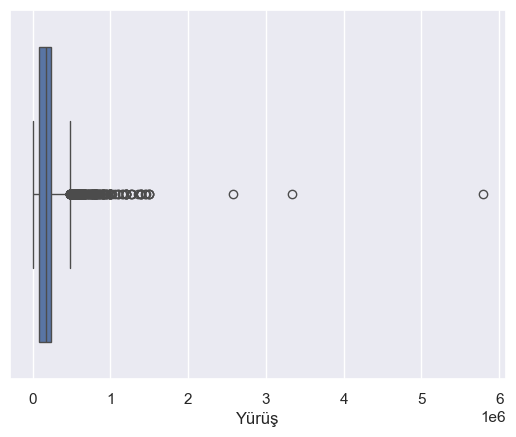

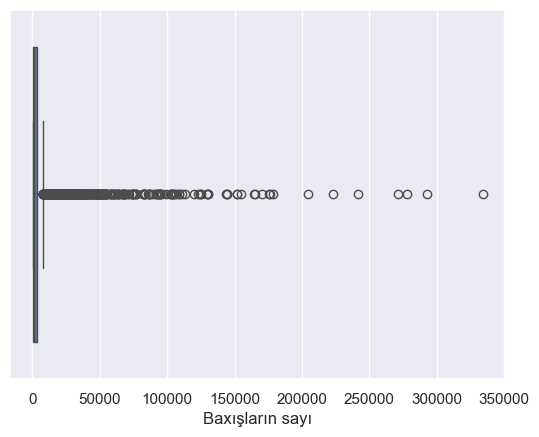

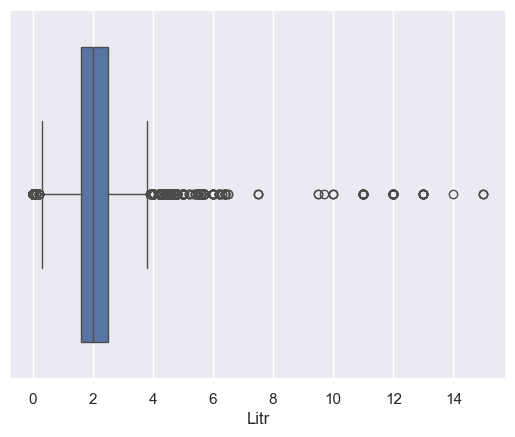

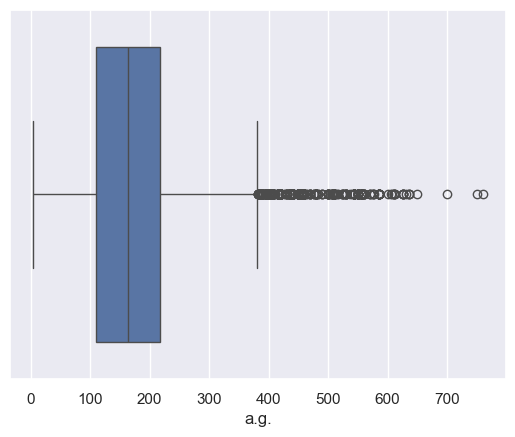

In [16]:
# checking outliers
columns = ['Yürüş', 'Baxışların sayı', 'Litr', 'a.g.']
for column in columns:
    if data[column].dtypes != object:
        sns.boxplot(data = data, x = column)
        plt.show()

In [17]:
q1 = data.quantile(0.25, numeric_only = True)
q3 = data.quantile(0.75, numeric_only = True)

IQR = q3 - q1
Upper = q3 + 1.5 * IQR
Lower = q1 - 1.5 * IQR

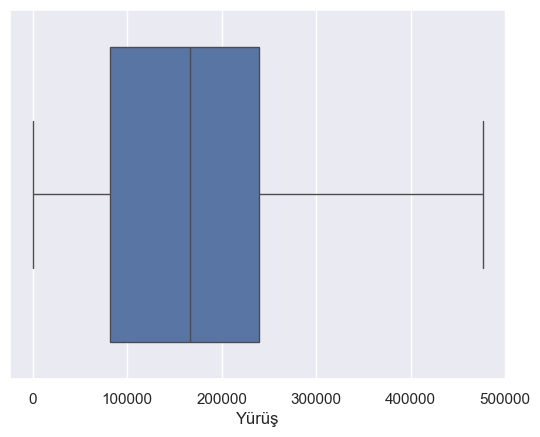

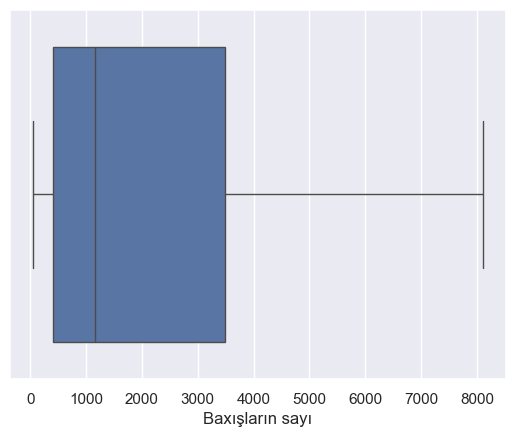

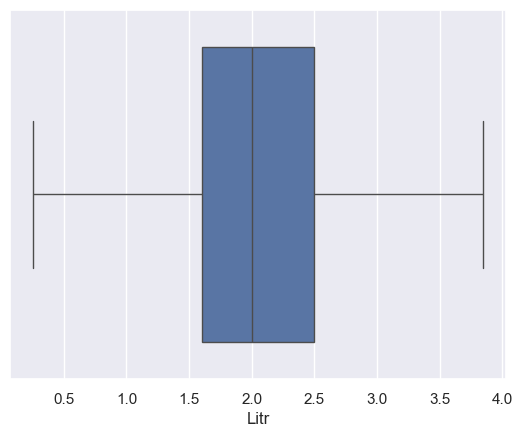

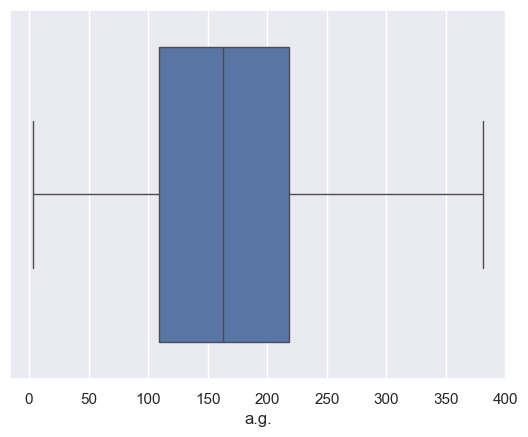

In [18]:
# All outliers has been replace with Upper and Lower boundries

for column in columns:
    if data[column].dtypes != object:
        data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
        data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])
        sns.boxplot(data = data, x = column)
        plt.show()

# Correlation

In [19]:
# checking whether data is normally distributed or not 
for column in data.columns:
    
    if data[column].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[column], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {column}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Avtosalon
Kolmogorov-Smirnov Test:
Test Statistic: 0.5
p-value: 0.0
Data does not look normally distributed

Column: Qiymet_AZN
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Buraxılış ili
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Yürüş
Kolmogorov-Smirnov Test:
Test Statistic: 0.9269997133484281
p-value: 0.0
Data does not look normally distributed

Column: Baxışların sayı
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Sahiblər
Kolmogorov-Smirnov Test:
Test Statistic: 0.7801447460685429
p-value: 0.0
Data does not look normally distributed

Column: Yerlərin sayı
Kolmogorov-Smirnov Test:
Test Statistic: 0.9861501019683699
p-value: 0.0
Data does not look normally distributed

Column: Yüngül lehimli disklər
Kolmogorov-Smirnov Test:
Test Statistic: 0.756244746068543
p-value: 0.0
Data does not look norm

In [20]:
# since data is not distributed normally, method will be spearman. And if independent columns' correlation with target is more than 40% is selected  
def target_correlation(data, target, threshold=0.4):
    corr_matrix = data.corr(method='spearman', numeric_only = True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'Qiymet_AZN')

target_result

,Variable,Correlation with Target
0,Buraxılış ili,0.751665
1,Yürüş,-0.480106
2,Sürətlər qutusu,-0.536053
3,Yağış sensoru,0.415321
4,Park radarı,0.464779
5,Oturacaqların isidilməsi,0.454107
6,Dəri salon,0.438155
7,Arxa görüntü kamerası,0.475035
8,Litr,0.507003
9,a.g.,0.770204


In [27]:
# if intercorrelation between independent columns are more than 80% will be dropped
def intercorrelation(data, target, threshold=0.8):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only = True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'Qiymet_AZN')
intercorrelated_result

,Variable 1,Variable 2


In [28]:
target_result.Variable.tolist()

['Buraxılış ili',
 'Yürüş',
 'Sürətlər qutusu',
 'Yağış sensoru',
 'Park radarı',
 'Oturacaqların isidilməsi',
 'Dəri salon',
 'Arxa görüntü kamerası',
 'Litr',
 'a.g.']

In [31]:
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result

vif_result = calculate_vif(data, [ 
                                     #'Buraxılış ili',
                                     'Yürüş',
                                     'Sürətlər qutusu',
                                     'Yağış sensoru',
                                     'Park radarı',
                                     'Oturacaqların isidilməsi',
                                     'Dəri salon',
                                     'Arxa görüntü kamerası',
                                     #'Litr',
                                     'a.g.'
])

vif_result

,VIF,Features
0,2.464795,Yürüş
1,1.360068,Sürətlər qutusu
2,5.828588,Yağış sensoru
3,6.414968,Park radarı
4,5.765601,Oturacaqların isidilməsi
5,5.486703,Dəri salon
6,5.364066,Arxa görüntü kamerası
7,6.140886,a.g.


In [34]:
features = [
    'Yürüş',
    'Sürətlər qutusu',
    'Yağış sensoru',
    'Park radarı',
    'Oturacaqların isidilməsi',
    'Dəri salon',
    'Arxa görüntü kamerası',
    'a.g.'
]

In [32]:
# we can use scale method for scaling all columns
input = data.drop(columns = ['Qiymet_AZN'])
output = data['Qiymet_AZN']

scaler = StandardScaler()
scaler.fit(input)

inputs_scaled = scaler.transform(input)

data_scaled = pd.DataFrame(inputs_scaled, columns=input.columns)

data_scaled

,Avtosalon,Şəhər,Marka,Model,Buraxılış ili,Ban növü,Rəng,Yürüş,Sürətlər qutusu,Ötürücü,Yeni,Baxışların sayı,Sahiblər,Hansı bazar üçün yığılıb,Yerlərin sayı,Qəzalı,Vuruq_veziyyet,Reng_veziyyet,Yüngül lehimli disklər,ABS,Lyuk,Yağış sensoru,Mərkəzi qapanma,Park radarı,Kondisioner,Oturacaqların isidilməsi,Dəri salon,Ksenon lampalar,Arxa görüntü kamerası,Yan pərdələr,Oturacaqların ventilyasiyası,yenilendi_gun,Litr,a.g.,Yanacaq_novu
0,-0.583355,-0.460909,-0.692956,-0.807580,-1.208168,-0.098624,2.148990,0.735042,-0.584607,-0.220828,0.281864,-0.501554,-0.398562,-0.084232,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,-1.065972,0.601841,0.311017,0.689465,0.314293,0.760941,-1.279504,0.672004,-1.437221,-1.142690,-0.903073,0.216084,-0.185458,-0.340128,-0.561704
1,-0.583355,-0.460909,-0.079893,0.914777,0.229913,0.652892,1.262452,0.631430,-0.584607,0.955668,0.281864,-0.543614,1.116883,1.777252,-1.218312,0.0,0.112964,0.290049,-3.278854,0.287203,-1.065972,0.601841,0.311017,-1.450401,0.314293,-1.314163,-1.279504,0.672004,0.695787,0.875128,-0.903073,0.216084,-0.968010,-0.817595,-0.561704
2,1.714222,-0.460909,1.615047,0.677474,1.428315,0.652892,0.597549,-1.457789,3.198030,0.955668,-3.547810,2.170820,-0.398562,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,0.601841,0.311017,0.689465,0.314293,0.760941,0.781553,0.672004,0.695787,0.875128,1.107330,-3.082406,-0.968010,0.507375,4.063274
3,-0.583355,-0.460909,0.424983,0.976016,0.229913,0.652892,0.597549,-0.098947,-0.584607,-1.397324,0.281864,-0.841829,-0.398562,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,0.601841,0.311017,0.689465,0.314293,0.760941,0.781553,0.672004,0.695787,0.875128,1.107330,0.545933,2.227410,2.459020,-0.561704
4,-0.583355,-0.460909,-0.692956,-0.677447,-0.369287,0.652892,-1.175527,0.240763,-0.584607,0.955668,0.281864,-0.250326,1.116883,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,-3.481862,-1.065972,-1.661569,-3.215256,-1.450401,0.314293,-1.314163,0.781553,-1.488086,-1.437221,-1.142690,-0.903073,0.545933,-1.098435,-0.960835,2.907030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.583355,-0.460909,-1.955146,-1.351080,0.589434,0.652892,1.927355,-0.710426,-0.584607,-1.397324,0.281864,0.014543,-0.398562,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,0.601841,0.311017,0.689465,0.314293,0.760941,0.781553,0.672004,0.695787,0.875128,1.107330,-0.113765,-0.185458,0.829665,-0.561704
9996,1.714222,2.162283,-0.584769,1.113805,-0.009767,0.652892,-1.175527,0.750329,-0.584607,0.955668,0.281864,2.170820,-1.914008,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,0.601841,0.311017,0.689465,0.314293,0.760941,0.781553,0.672004,0.695787,-1.142690,-0.903073,-0.113765,0.336243,-0.017838,-0.561704
9997,-0.583355,0.194889,1.615047,0.677474,-0.968488,0.652892,2.148990,0.414449,-0.584607,0.955668,0.281864,-0.862670,-0.398562,-0.549603,-1.218312,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,-1.661569,0.311017,-1.450401,0.314293,0.760941,-1.279504,-1.488086,-1.437221,-1.142690,-0.903073,0.545933,-0.446309,-0.304318,-0.561704
9998,-0.583355,-0.460909,-1.955146,-1.362562,1.068794,0.652892,-0.732258,-0.997481,-0.584607,-1.397324,0.281864,-0.363246,-0.398562,-0.549603,-0.113668,0.0,0.112964,0.290049,0.304985,0.287203,0.938111,0.601841,0.311017,0.689465,0.314293,0.760941,0.781553,0.672004,0.695787,0.875128,1.107330,-3.412255,-0.185458,0.101529,-0.561704


In [36]:
data_scaled = data_scaled[features]
data_scaled

,Yürüş,Sürətlər qutusu,Yağış sensoru,Park radarı,Oturacaqların isidilməsi,Dəri salon,Arxa görüntü kamerası,a.g.
0,0.735042,-0.584607,0.601841,0.689465,0.760941,-1.279504,-1.437221,-0.340128
1,0.631430,-0.584607,0.601841,-1.450401,-1.314163,-1.279504,0.695787,-0.817595
2,-1.457789,3.198030,0.601841,0.689465,0.760941,0.781553,0.695787,0.507375
3,-0.098947,-0.584607,0.601841,0.689465,0.760941,0.781553,0.695787,2.459020
4,0.240763,-0.584607,-1.661569,-1.450401,-1.314163,0.781553,-1.437221,-0.960835
...,...,...,...,...,...,...,...,...
9995,-0.710426,-0.584607,0.601841,0.689465,0.760941,0.781553,0.695787,0.829665
9996,0.750329,-0.584607,0.601841,0.689465,0.760941,0.781553,0.695787,-0.017838
9997,0.414449,-0.584607,-1.661569,-1.450401,0.760941,-1.279504,-1.437221,-0.304318
9998,-0.997481,-0.584607,0.601841,0.689465,0.760941,0.781553,0.695787,0.101529


# Model Building

In [37]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(data_scaled, output, test_size = 0.2, random_state = 42)

In [38]:
input = new_data.drop(columns = ['Qiymet_AZN'])
output = new_data['Qiymet_AZN']

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [52]:
pd.options.display.float_format = "{:.4f}".format
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):

        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # calculating metrics for test data
        mae_test  = metrics.mean_absolute_error(y_test,y_pred_test)
        mse_test = metrics.mean_squared_error(y_test,y_pred_test)
        rmse_test = np.sqrt(mse_test)
        r2_test = metrics.r2_score(y_test,y_pred_test)

        # calculating metrics for train data
        mae_train  = metrics.mean_absolute_error(y_train,y_pred_train)
        mse_train = metrics.mean_squared_error(y_train,y_pred_train)
        rmse_train = np.sqrt(mse_train)
        r2_train = metrics.r2_score(y_train,y_pred_train)
    
        # Create a DataFrame to store the results
        results_dict = {
                    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
                    'Train': [mae_train, mse_train, rmse_train, r2_train],
                    'Test': [mae_test, mse_test, rmse_test, r2_test]
        }
        results_df = pd.DataFrame(results_dict)
        print(f'Model Performance for {model_name}')
        print(results_df)
        print()
    
        return 100*r2_train, 100*r2_test

In [53]:
# taken 'models' list and models added to it
models = []

# all models created
lin_regr_model = LinearRegression()
xgb_model_def = XGBRegressor()
lgb_model_def = LGBMRegressor()
catboost_model_def = CatBoostRegressor()
random_forest_def = RandomForestRegressor()

models.extend([
    ('Linear Regression', lin_regr_model),
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('Random Forest', random_forest_def)
])

In [54]:
r2_df = pd.DataFrame(columns=['Model', 'R2_train', 'R2_test'])

for model_name, model in models:
    if model_name == 'Linear Regression':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_lin, y_train_lin, X_test_lin, y_test_lin)
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if r2_train is not None:
        r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)
        
r2_df_sorted = r2_df.sort_values(by='R2_test', ascending=False)

Model Performance for Linear Regression
  Metric           Train            Test
0    MAE      18732.5011      18436.6830
1    MSE 1391583748.0496 1367153255.8279
2   RMSE      37303.9374      36975.0356
3     R2          0.4367          0.4626



C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\447861561.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)


Model Performance for XGBoost
  Metric        Train           Test
0    MAE    1997.3463      4996.3011
1    MSE 9219115.8740 125678176.8363
2   RMSE    3036.2997     11210.6279
3     R2       0.9963         0.9506

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 34
[LightGBM] [Info] Start training from score 36245.749836
Model Performance for LightGBM
  Metric          Train           Test
0    MAE      3932.0934      5592.8779
1    MSE 202576429.2511 164112557.5883
2   RMSE     14232.9347     12810.6424
3     R2         0.9180         0.9355

Learning rate set to 0.056868
0:	learn: 47932.3776806	total: 9.09ms	

In [55]:
r2_df_sorted

,Model,R2_train,R2_test
3,CatBoost,99.0563,96.0953
1,XGBoost,99.6268,95.0594
4,Random Forest,97.9215,93.6630
2,LightGBM,91.7997,93.5485
0,Linear Regression,43.6684,46.2556


# Model Optimization

In [56]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_reg = XGBRegressor(**param)

    auc = cross_val_score(xgb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBRegressor(**best_params)

[I 2024-05-29 09:22:23,263] A new study created in memory with name: no-name-222385d2-f321-403b-9143-0b08577d25ab
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\3531340600.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\3531340600.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\3531340600.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best trial:
  Value: 0.864
  Params:  {'n_estimators': 862, 'learning_rate': 0.062058390943743255, 'max_depth': 6, 'subsample': 0.6877773995491641, 'colsample_bytree': 0.8825982934198231, 'gamma': 4}


In [57]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_reg = LGBMRegressor(**param)

    auc = cross_val_score(lgb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMRegressor(**best_params)

[I 2024-05-29 09:23:46,951] A new study created in memory with name: no-name-b2781f90-d821-4acd-ac89-3500c1ae433c
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\1177000557.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-29 09:23:50,070] Trial 0 finished with value: 0.7778738416146189 and parameters: {'n_estimators': 769, 'learning_rate': 0.3133360503804279, 'max_depth': 4, 'num_leaves': 41}. Best is trial 0 with value: 0.7778738416146189.
[I 2024-05-29 09:23:53,165] Trial 1 finished with value: 0.799727460302793 and parameters: {'n_estimators': 869, 'learning_rate': 0.06616820316352738, 'max_depth': 4, 'num_leaves': 46}. Best is trial 1 with value: 0.799727460302793.
[I 2024-05-29 09:23:54,824] Trial 2 finished with value: 0.8115081539706135

Best trial:
  Value: 0.842
  Params:  {'n_estimators': 744, 'learning_rate': 0.020911744297020925, 'max_depth': 10, 'num_leaves': 61}


In [58]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_reg = CatBoostRegressor(**param)

    auc = cross_val_score(cb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostRegressor(**best_params)

[I 2024-05-29 09:24:09,600] A new study created in memory with name: no-name-badf04ca-81a5-4f5a-877b-8506f6138033
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\277029420.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\277029420.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-29 09:24:14,983] Trial 0 finished with value: 0.8634039959775383 and parameters: {'iterations': 321, 'learnin

Best trial:
  Value: 0.869
  Params:  {'iterations': 914, 'learning_rate': 0.19750555607148196, 'depth': 6, 'l2_leaf_reg': 4.181381513458638, 'loss_function': 'RMSE'}


In [60]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    rf_reg = RandomForestRegressor(**param)

    auc = cross_val_score(rf_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value)) 
print('  Params: ', best_params)

best_rf_model = RandomForestRegressor(**best_params)

[I 2024-05-29 09:30:54,795] A new study created in memory with name: no-name-dcee7d40-efe3-4ef0-b3bd-4004dde90aa7
[I 2024-05-29 09:31:08,620] Trial 0 finished with value: 0.7762269542163557 and parameters: {'n_estimators': 863, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 0.7762269542163557.
[I 2024-05-29 09:31:25,609] Trial 1 finished with value: 0.7698663718805498 and parameters: {'n_estimators': 907, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.7762269542163557.
[I 2024-05-29 09:31:33,902] Trial 2 finished with value: 0.581547695863053 and parameters: {'n_estimators': 548, 'max_depth': 3, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.7762269542163557.
[I 2024-05-29 09:31:44,143] Trial 3 finished with value: 0.7435031623619123 and parameters: {'n_estimators': 812, 'max_depth': 6, 'min_s

Best trial:
  Value: 0.805
  Params:  {'n_estimators': 756, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}


In [61]:
# optimized models created and added to the list
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('RandomForest Optuna', best_rf_model)
])

In [62]:
r2_df_optuna = pd.DataFrame(columns=['Model', 'R2_train', 'R2_test'])

for model_name, model in models_optimized:
    if model_name == 'CatBoost_Custom':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name == 'Linear Regression':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_lin, y_train_lin, X_test_lin, y_test_lin)
    elif model_name in ['Random Forest', 'SVM Optuna']:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_filled, y_train, X_test_filled, y_test)
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if r2_train is not None:
        r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)
        
r2_df_sorted_optuna = r2_df_optuna.sort_values(by='R2_test', ascending=False)

Model Performance for XGBoost Optuna
  Metric        Train           Test
0    MAE    1112.2882      4591.0788
1    MSE 2380292.7058 126245301.0329
2   RMSE    1542.8197     11235.8934
3     R2       0.9990         0.9504

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 34
[LightGBM] [Info] Start training from score 36245.749836


C:\Users\Admin\AppData\Local\Temp\ipykernel_6680\2864106578.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [63]:
final_review = pd.concat([r2_df_sorted,r2_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='R2_test', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,R2_train,R2_test
0,CatBoost,99.0563,96.0953
1,CatBoost Optuna,99.7361,95.2757
2,XGBoost,99.6268,95.0594
3,XGBoost Optuna,99.9036,95.0372
4,Random Forest,97.9215,93.6630
5,LightGBM Optuna,93.3637,93.6397
6,LightGBM,91.7997,93.5485
7,RandomForest Optuna,86.9323,89.2859
8,Linear Regression,43.6684,46.2556


# Univariate Analysis

In [70]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a regression model using the single variable on the training set
    xgb_model_def.fit(X_train_single_var, y_train)
    y_pred_train_single_var = xgb_model_def.predict(X_train_single_var)

    # Calculate R2 for the single variable model on the training set
    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    # Fit a regression model using the single variable on the test set
    y_pred_test_single_var = xgb_model_def.predict(X_test_single_var)

    # Calculate R2 for the single variable model on the test set
    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    # Append the results to the lists
    variables.append(i)
    train_r2_scores.append(100*train_r2)
    test_r2_scores.append(100*test_r2)

# Create a DataFrame from the results

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
33,a.g.,49.4917,45.9027
3,Model,46.0728,43.5795
4,Buraxılış ili,41.9404,34.4682
2,Marka,28.3514,33.6824
32,Litr,31.5500,33.1899
7,Yürüş,27.0936,26.1271
10,Yeni,15.5212,19.3466
9,Ötürücü,18.0189,16.9550
5,Ban növü,15.3722,13.5213
13,Hansı bazar üçün yığılıb,10.6480,12.6820


In [75]:
features = results_df_sorted[results_df_sorted['Test R2'] > 30].Variable
features

33             a.g.
3             Model
4     Buraxılış ili
2             Marka
32             Litr
Name: Variable, dtype: object

In [77]:
fin_input = new_data[features]
fin_output = new_data['Qiymet_AZN']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.2, random_state=42)

In [79]:
train_and_evaluate_model('XGB with Univariate Analysis', xgb_model_def, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

Model Performance for XGB with Univariate Analysis
  Metric         Train           Test
0    MAE     2782.5850      4933.2775
1    MSE 26733445.5489 139915850.8342
2   RMSE     5170.4396     11828.6031
3     R2        0.9892         0.9450



(98.91782363001039, 94.49974539524561)

In [80]:
xgb_model_def.fit(X_train_uni, y_train_uni)
xgb_model_def.save_model('xgboost_model_streamlit.json')

In [83]:
new_data[features].iloc[1, :]

a.g.             107.0000
Model            688.0000
Buraxılış ili   2012.0000
Marka             54.0000
Litr               1.4000
Name: 1, dtype: float64

# Prediction

In [85]:
xgb_model_def.predict([[107.0000, 688.0000, 2012.0000, 54.0000, 1.4000]])

array([15600.068], dtype=float32)